In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
infile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/OurCD8TIL_ranked/compare_BSseq_EMseq_result/cross_correlation_divideby_mappedreads/BS_melanoma_cfDNA_rawscore_onlybad.txt'
qcfile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/OurCD8TIL_ranked/compare_BSseq_EMseq_result/cross_correlation_divideby_mappedreads/YALE_model_data_bam_flag_merged.txt'

outfile=infile+"_"+os.path.basename(qcfile)

indf=pd.read_csv(infile,sep='\t',index_col='Mixture')
indf.head()

,YU ID,Naive CD4 T,Naive CD8,Naive B,NK,Mono,Mac (M0),Mac (M1),Mac (M2),iDC,...,Tregs,CD4 TEM,CD8 TEMRA,Megakaryocyte,CD4 TCM,Erythrocyte,Memory B,CD8TIL,Response,Toxicity
Mixture,,,,,,,,,,,,,,,,,,,,,
Y-3674-cfDNA,YUTACI,69.724156,41.195384,125.985218,179.928147,262.405437,70.324219,175.853092,138.617708,84.640165,...,45.419308,147.448601,224.864507,283.707708,59.807872,256.017733,164.216000,10.979528,DCB,0.0
Y-3688-cfDNA,YUTORY,139.548843,97.948004,242.477721,297.520878,376.910132,158.846782,427.413174,309.241717,148.127392,...,124.049654,389.746070,411.534037,679.376019,149.669385,586.230388,369.965611,4.274583,NDB,3.0
Y-3694-cfDNA,YULENIO,127.774600,86.237794,255.559379,361.742849,646.551582,171.160607,377.173729,342.966924,171.929271,...,95.617517,266.082517,425.144717,580.344031,132.712532,472.438054,340.064182,9.409250,DCB,NaN
Y-3703-cfDNA,YUAMIGO,97.607771,51.603312,146.849449,217.349066,268.103245,95.642941,244.503122,231.104245,89.234998,...,74.132234,224.628005,313.086337,415.910435,95.947925,451.393721,237.829931,8.027000,DCB,3.0
Y-3707-cfDNA,YUZIRG,48.234085,22.391011,75.402706,103.952474,130.150560,36.089737,114.169852,91.435960,44.846261,...,28.957635,56.245685,111.215946,222.976482,34.321942,179.406119,94.341272,2.367167,NDB,0.0


In [2]:
cell_columns=['Naive CD4 T', 'Naive CD8', 'Naive B', 'NK', 'Mono','Mac (M0)', 'Mac (M1)', 'Mac (M2)', 'iDC', 'mDC', 'PMN', 'CD8 TCM','CD8 TEM', 'Eosinophil', 'Tregs', 'CD4 TEM', 'CD8 TEMRA','Megakaryocyte', 'CD4 TCM', 'Erythrocyte', 'Memory B', 'CD8TIL']

In [3]:
qcdf=pd.read_csv(qcfile,sep='\t',index_col='Mixture')
qcdf.head()

,total,secondary,supplementary,duplicates,mapped,mapped_percent,paired_in_sequencing,read1,read2,properly_paired,properly_paired_percentage,with_itself_and_mate_mapped,singletons,with_mate_mapped_to_a_different_chr,with_mate_mapped_to_a_different_chr_mapQ>=5
Mixture,,,,,,,,,,,,,,,
Y-3737-cfDNA,787275820,8612548,5197440,108077914,774954510,98.434944,773465832,386732916,386732916,660186058,85.354263,760289428,855094,16625246,4234197
Y-3925-cfDNA,1000462349,25995997,693874,888864861,977499114,97.704738,973772478,486886239,486886239,918909354,94.365920,946025598,4783645,25791338,3041194
Y-3918-cfDNA,700196600,14355439,580841,618317611,677458601,96.752626,685260320,342630160,342630160,639153998,93.271707,658668112,3854209,18631448,2237904
Y-3920-cfDNA,725289301,18655761,458144,643929217,701770402,96.757308,706175396,353087698,353087698,655272842,92.791797,678297356,4359141,21973666,2575654
Y-3893-cfDNA,814220562,18753684,1276444,398329405,512934496,62.996996,794190434,397095217,397095217,375549410,47.287073,476168808,16735560,87286008,8163150


In [4]:
indfct=indf[cell_columns].copy()

In [5]:
indfct_divby_mappedread=indfct.div(qcdf['mapped'],axis=0)
indfct_divby_mappedread=indfct_divby_mappedread.dropna(how='all')
indfct_divby_mappedread.head()

,Naive CD4 T,Naive CD8,Naive B,NK,Mono,Mac (M0),Mac (M1),Mac (M2),iDC,mDC,...,CD8 TEM,Eosinophil,Tregs,CD4 TEM,CD8 TEMRA,Megakaryocyte,CD4 TCM,Erythrocyte,Memory B,CD8TIL
Mixture,,,,,,,,,,,,,,,,,,,,,
Y-3674-cfDNA,9.597442e-08,5.670493e-08,1.734171e-07,2.476688e-07,3.611978e-07,9.680040e-08,2.420596e-07,1.908055e-07,1.165061e-07,1.218668e-07,...,1.387625e-07,1.430019e-06,6.251911e-08,2.029611e-07,3.095232e-07,3.905201e-07,8.232478e-08,3.524052e-07,2.260413e-07,1.511318e-08
Y-3688-cfDNA,3.955997e-07,2.776676e-07,6.873873e-07,8.434263e-07,1.068483e-06,4.503064e-07,1.211651e-06,8.766530e-07,4.199185e-07,4.535213e-07,...,7.955739e-07,5.080386e-06,3.516618e-07,1.104871e-06,1.166636e-06,1.925927e-06,4.242899e-07,1.661874e-06,1.048796e-06,1.211779e-08
Y-3694-cfDNA,8.867407e-08,5.984801e-08,1.773552e-07,2.510453e-07,4.486992e-07,1.187834e-07,2.617541e-07,2.380150e-07,1.193169e-07,1.265548e-07,...,1.539691e-07,1.306633e-06,6.635743e-08,1.846581e-07,2.950454e-07,4.027519e-07,9.210094e-08,3.278665e-07,2.360005e-07,6.529909e-09
Y-3703-cfDNA,9.465351e-08,5.004145e-08,1.424048e-07,2.107706e-07,2.599887e-07,9.274815e-08,2.371028e-07,2.241095e-07,8.653415e-08,1.113762e-07,...,1.765653e-07,1.188285e-06,7.188850e-08,2.178293e-07,3.036103e-07,4.033222e-07,9.304390e-08,4.377315e-07,2.306316e-07,7.784049e-09
Y-3707-cfDNA,5.827528e-08,2.705229e-08,9.109976e-08,1.255929e-07,1.572448e-07,4.360276e-08,1.379373e-07,1.104708e-07,5.418219e-08,6.911174e-08,...,7.238640e-08,5.692192e-07,3.498593e-08,6.795470e-08,1.343685e-07,2.693949e-07,4.146696e-08,2.167542e-07,1.139809e-07,2.859955e-09


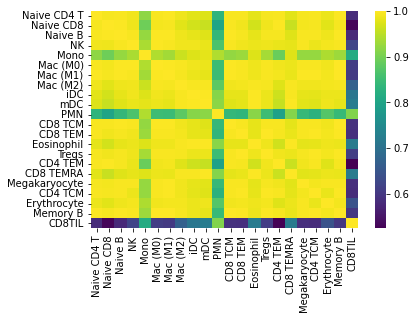

In [6]:
corr = indfct_divby_mappedread.corr(method='pearson')

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='viridis')
plt.savefig(outfile + '_CT_crosscorrelation.pdf', bbox_inches='tight')